<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>



# **Agrupar los diferente tipos de hospedaje de acuerdo a sus características(Cluster) Predicción del precio de hospedajes en Airbnb para la ciudad de Amsterdam**

# Christian Ruiz-Promocion 30 de BigData

## Indicaciones para resolver el Taller

## Cargar las librerías necesarias

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2


Este caso de uso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
```



## Cargar el dataset de trabajo

In [ ]:
pd.options.display.max_columns = 1000 # Permite visualizar todas las columnas del dataframe

airbnb =  pd.read_excel('https://github.com/chris78rey/DIPLOM_BIGDATA/blob/main/amsterdam_airbnb.xlsx?raw=true')

airbnb.head(3)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23726706.0,https://www.airbnb.com/rooms/23726706,2.022061e+13,2022-06-05,Private room 20 minutes from Amsterdam + Break...,Cousy private room 20 min. from Amsterdam. Sh...,We live in a nice Cousy and clean house with e...,https://a0.muscache.com/pictures/eb6d6636-02d6...,122619127.0,https://www.airbnb.com/users/show/122619127,Patricia,2017-03-26,"Diemen, North Holland, Netherlands","Hi, Welcome. we are so glade we are able to op...",within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/52706...,https://a0.muscache.com/im/pictures/user/52706...,--,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Diemen, Noord-Holland, Netherlands",IJburg - Zeeburgereiland,--,52.34916,4.97879,Private room in home,Private room,2.0,3.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",88.0,2.0,14.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,--,t,0.0,6.0,20.0,66.0,2022-06-05,78.0,11.0,3.0,2018-03-26,2022-05-29,4.99,4.96,4.97,4.95,4.97,4.73,4.87,038469D9AA6BDF1142CE,t,1.0,0.0,1.0,0.0,1.53
1,35815036.0,https://www.airbnb.com/rooms/35815036,2.022061e+13,2022-06-05,"Vrijstaand vakantiehuis, privÃ© tuin aan het w...",Bij het pittoreske dorpje Watergang ligt ons p...,U heeft hier diverse mogelijkheden. Zo kunt u ...,https://a0.muscache.com/pictures/e309d415-78de...,269425139.0,https://www.airbnb.com/users/show/269425139,Lydia,2019-06-18,"Watergang, North Holland, Netherlands",--,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/af417...,https://a0.muscache.com/im/pictures/user/af417...,--,1.0,1.0,"['email', 'phone']",t,t,"Watergang, Noord-Holland, Netherlands",Noord-Oost,--,52.42419,4.95689,Tiny home,Entire home/apt,2.0,4.0,1.5 baths,1.0,1.0,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",105.0,3.0,100.0,1.0,3.0,1125.0,1125.0,3.0,1125.0,--,t,4.0,6.0,12.0,243.0,2022-06-05,95.0,36.0,6.0,2019-06-26,2022-06-02,4.96,4.94,5.00,4.98,4.98,4.81,4.83,--,f,1.0,1.0,0.0,0.0,2.65
2,31553121.0,https://www.airbnb.com/rooms/31553121,2.022061e+13,2022-06-05,Quiet Guesthouse near Amsterdam,Welcome to the countryside north of Amsterdam ...,Within 6 kilometers of the city center you'll ...,https://a0.muscache.com/pictures/64edc273-3b2b...,76806621.0,https://www.airbnb.com/users/show/76806621,Ralf,2016-06-09,"Landsmeer, North Holland, Netherlands",--,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/1df22...,https://a0.muscache.com/im/pictures/user/1df22...,--,1.0,1.0,"['email', 'phone']",t,t,"Landsmeer, Noord-Holland, Netherlands",Noord-West,--,52.43237,4.91821,Entire guesthouse,Entire home/apt,4.0,2.0,1 bath,1.0,3.0,"[""Dishwasher"", ""Carbon monoxide alarm"", ""Ether...",152.0,2.0,60.0,2.0,2.0,1125.0,1125.0,2

In [ ]:
airbnb['price'].describe()

count    1121.000000
mean      181.939340
std       110.144288
min        28.000000
25%       110.000000
50%       150.000000
75%       225.000000
max       911.000000
Name: price, dtype: float64

In [ ]:
# Dimensiones del dataframe
airbnb.shape

(1122, 74)

In [ ]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1122 non-null   float64
 1   listing_url                                   1122 non-null   object 
 2   scrape_id                                     1122 non-null   float64
 3   last_scraped                                  1122 non-null   object 
 4   name                                          1122 non-null   object 
 5   description                                   1122 non-null   object 
 6   neighborhood_overview                         1122 non-null   object 
 7   picture_url                                   1122 non-null   object 
 8   host_id                                       1122 non-null   float64
 9   host_url                                      1122 non-null   o

## Análisis Univariado

### Ejercicio 1

Como puede observar en el resumen anterior, el dataframe airbnb tiene 28 columnas. 
Haga la detección de las variables listadas a continuación, siga la tabla de ejemplo.

* price
* latitud
* longitud
* host_is_superhost
* neighbourhood
* property_type
* room_types
* bathrooms
* bedrooms
* number_of_reviews
* reviews_per_month


[Aquí](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) encontrará el diccionario de Datos para el conjunto de datos de trabajo.

Nota: Puede encontrar variables que estén representadas por números, sin embargo, su tipología es cualitativa o categórica.

Respuesta:

|Nombre de la variable|Descripción|Tipología estadística|Tipología computacional|
|---|---|---|---|
|price|Precio diario en dólares|Cuantitativa continua|int|
|latitude|Latitud basado en World Geodetic System|Cuantitativa continua|float|
|parking|Si tiene o no tiene parqueadero|Cualitativa dicotómico|int|
|host_is_superhost|Toma el valor de true o false|Cualitativa dicotómico|boolean|
|neighbourhood|Vecindario|Cuantitativa continua|text|
|property_type|Tipo de propiedad autoseleccionable|Cualitativa dicotómico|text|
|room_types|Agrupamiento de las casas|Cualitativa dicotómico|text|
|bathrooms|Numero de baños en la lista|Cuantitativa continua|numerico|
|bedrooms| Numero de dormitorios|Cuantitativa continua|int|
|number_of_reviews|Numero de revisiones|Cuantitativa continua|int|
|reviews_per_month|Numero de revisiones en su vida útil|Cuantitativa continua|numerico|

### Ejercicio 2

Obtenga un resumen estadístico para las variables: price, bedrooms, bathrooms latitude y longitude. Haga un corto análisis de sus hallazgos. ¿Cuál es el rango de cada variable? ¿La distribución de la variable es simétrica? ¿Hay atípicos? ¿Los valores son lógicos en el contexto del negocio?



<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>



* Filtre las 5 variables, obtendrá un dataframe solo con esas columnas.
* Aplique el método `describe()`

In [ ]:
# Respuesta:
airbnb5col=airbnb[['price','bedrooms','bathrooms','latitude','longitude']]
airbnb5col
airbnb5col.describe()
airbnb5col.rank()

airbnb5col


,price,bedrooms,bathrooms,latitude,longitude
0,88.0,1.0,3.0,52.34916,4.97879
1,105.0,1.0,4.0,52.42419,4.95689
2,152.0,1.0,2.0,52.43237,4.91821
3,160.0,2.0,2.0,52.31475,5.03030
4,140.0,2.0,3.0,52.33828,4.96443
...,...,...,...,...,...
1117,200.0,4.0,1.0,52.36118,4.92798
1118,289.0,3.0,4.0,52.35917,4.87933
1119,225.0,1.0,3.0,52.36665,4.88254
1120,231.0,2.0,1.0,52.38408,4.84556


AxesSubplot(0.125,0.125;0.775x0.755)


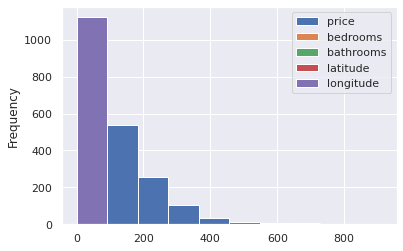

In [ ]:
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

# **Los histogramas son gráficos que indican la frecuencia de un hecho mediante una distribución de los datos, en este caso que existe un lugar en específico en que las personas que visitan Amsterdan buscan alojarse**


AxesSubplot(0.125,0.125;0.775x0.755)


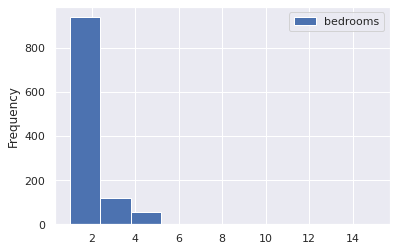

In [ ]:
airbnb5col=airbnb[['bedrooms']]
histogram = airbnb5col.plot.hist(   )
print(histogram)
plt.show()

# **En base al histograma se puede indentificar que en la gran mayoria de los datos el número de habitaciones más comun es 2**

AxesSubplot(0.125,0.125;0.775x0.755)


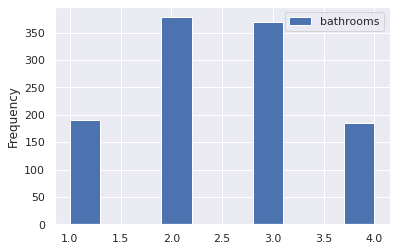

In [ ]:
airbnb5col=airbnb[['bathrooms']]
airbnb5col.head(100)
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

# **En base al histograma se puede indentificar que en la gran mayoria de los datos el número de baños más comun es 2**

AxesSubplot(0.125,0.125;0.775x0.755)


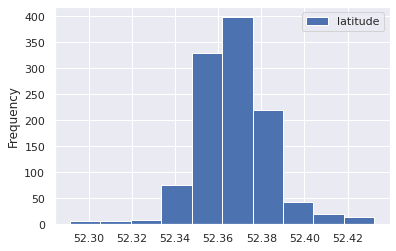

In [ ]:
airbnb5col=airbnb[['latitude']]
airbnb5col.head(100)
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


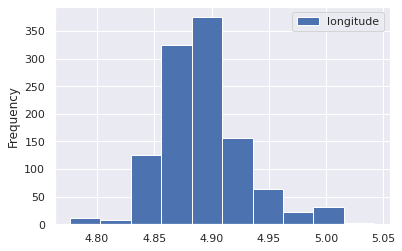

In [ ]:
airbnb5col=airbnb[['longitude']]
airbnb5col.head(100)
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

# **Observando de manera separada los gráficos de lat y long se puede establecer que existen zonas o barrios donde los viajeros prefieren hospedarse**

## Visualizaciones
Tenga presente las siguientes recomendaciones para todas las gráficas que realice.

Recuerde que una buena gráfica al menos debe tener:
* **título:** descripción corta de lo que se está mostrando
* **títulos de ejes:** título para la variable en x, título para la variable en y
* **análisis:** lo más valioso de la gráfica es la interpretación y análisis del analista, la gráfica por sí sola no genera valor

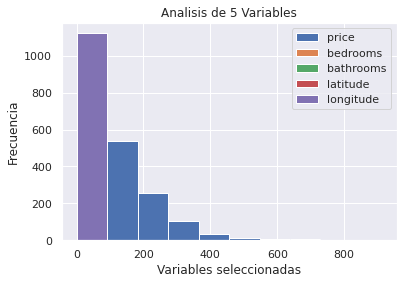

In [ ]:
airbnb5col=airbnb[['price','bedrooms','bathrooms','latitude','longitude']]

histogram = airbnb5col.plot.hist(  )
histogram.set_title('Analisis de 5 Variables')
histogram.set_xlabel ('Variables seleccionadas')
histogram.set_ylabel ('Frecuencia')

plt.show()

### Ejercicio 3

Revisemos nuestra variable objetivo price. Construya un histograma para conocer su distribución. 

Describa la distribución del precio, su forma, simetría, kurtosis, sesgo, presencia de atípicos. Puede también apoyarse de las estadísticas descriptivas obtenidas en el ejercicio anterior.





<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>



* Use `histplot()` de seaborn. Puede construir también el perfil de densidad kde.
* [Curtosis](https://pandas.pydata.org/docs/reference/api/pandas.Series.kurtosis.html?highlight=kurtosis#pandas.Series.kurtosis)
* [Sesgo](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html)

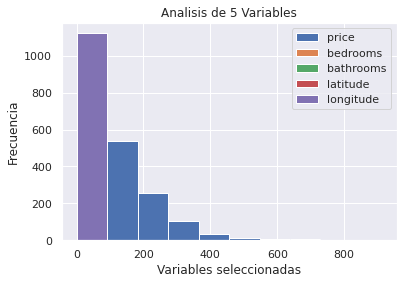

In [ ]:

airbnb5col=airbnb[['price','bedrooms','bathrooms','latitude','longitude']]

histogram = airbnb5col.plot.hist()
histogram.set_title('Analisis de 5 Variables')
histogram.set_xlabel ('Variables seleccionadas')
histogram.set_ylabel ('Frecuencia')
plt.show()

### Ejercicio 4

Acompañe el análisis del punto anterior con la construcción e interpretación de un boxplot para el precio.

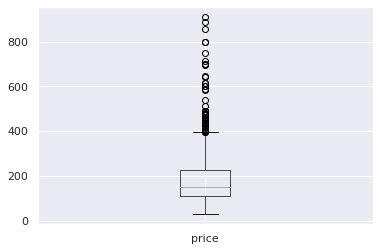

In [ ]:
df = pd.DataFrame(airbnb5col,
                  columns=['price'])
boxplot = df.boxplot(column=['price'] )  

# **El turismo como actividad económica, es un sector estratégico para Amsterdam, ,ciudad dotada por atractivos naturales de montaña únicos en el país y en el Caribe. Esta favorecedora ubicación explica el elevado flujo de turismo receptivo que anualmente visitan la ciudad, las condiciones naturales y su ubicación estratégica en Europa no bastan para el expedito desarrollo del turismo, por lo que es relevante el estudio de la competitividad del sector, donde la calidad de los servicios es fundamental y es por esto el análisis del Dataset, se puede obeservar en el boxplot que la media tiende a irse alredodor de $ 200,00 y los valores atípicos sobrepasan los 400 dólares**

### Ejercicio 5

Basado en lo que hemos hecho hasta ahora, analice las variables longitude y latitude. Use los recursos que crea necesarios para analizar de forma univariada estas 2 variables. No olvide discutir los resultados obtenidos.

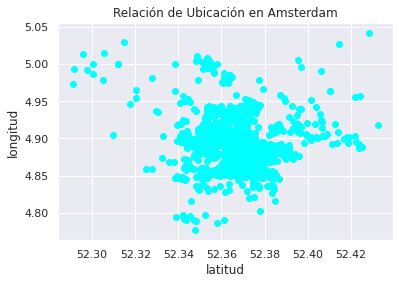

In [ ]:
# Respuesta
x =airbnb5col['latitude'].tolist()
y =airbnb5col['longitude'].tolist()
 
plt.scatter(x, y, c ="cyan")
plt.title('Relación de Ubicación en Amsterdam')
plt.xlabel('latitud')
plt.ylabel('longitud')

# To show the plot
plt.show()

# **La concentración urbana se define como la población del lugar más grande de la comuna, es así que Amsterdan según el análisis efectuado concentra sus puntos de visita más frecuentes entre los 52.36 y 4.90 en donde se observa la gran cantidad de hospedajes según el dataset**

### Ejercicio 6

Pasemos ahora a analizar las variables cualitativas ¿Cuántos barrios diferentes tiene la variable neighbourhood? 

Haga una gráfica que muestre la cantidad de hospedajes por barrio. Solamente muestre el top 10.





<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Métodos útiles:
`.nunique(), .unique(), .value_counts(),.sort_values(),head()`
* Obtenga la cantidad de valores únicos y una lista con el nombre de los barrios.
* Obtenga la tabla de frecuencia con la cantidad de hospedajes por barrio. 
* Organicela de mayor a menor a frecuencia.
* Grafique usando el método `.plot()`
* No olvide describir y analizar la visualización obtenida. ¿Todos los barrios tienen la misma cantidad de hospedajes? ¿Cuales son los 3 más importantes?
* ¿Qué porcentaje de los hospedajes están el top 3?

In [ ]:
# Respuesta
var1=airbnb['neighbourhood'].unique()
unicas=len(airbnb['neighbourhood'].unique())
print('Obtenga la cantidad de valores únicos y una lista con el nombre de los barrios ',unicas, ' y los barrios son:')
lista=var1.tolist()
for i in lista:
    print(i)



Obtenga la cantidad de valores únicos y una lista con el nombre de los barrios  26  y los barrios son:
Diemen, Noord-Holland, Netherlands
Watergang, Noord-Holland, Netherlands
Landsmeer, Noord-Holland, Netherlands
Weesp, Noord-Holland, Netherlands
--
Zuiderwoude, Noord-Holland, Netherlands
Abcoude, Utrecht, Netherlands
Amsterdam, Noord-Holland, Netherlands
Amsterdam, North Holland, Netherlands
Amsterdam, NH, Netherlands
Amsterdam, Netherlands, Netherlands
De Pijp, North Holland, Netherlands
Jordaan, North Holland, Netherlands
Zeeburg, North Holland, Netherlands
Amsterdam, Haarlemmerbuurt, Netherlands
Amsterdam, Netherlands
Amsterdam-Zuidoost, North Holland, Netherlands
Amsterdam, SN, Netherlands
Amsterdam Zuid-Oost, Noord-Holland, Netherlands
Amsterdam, Noord Holland, Netherlands
Amsterdam, GD, Netherlands
Amsterdam , 2 de Egelantiersdwarsstraat 13 III, Netherlands
Amsterdam-Zuidoost, Noord-Holland, Netherlands
Amsterdam, Noord- Holland, Netherlands
Amsterdam, North-Holland, Netherland

# **Se determina que hay 26 barrios que poseen la mayor cantidad de visitas**

Obtenga la tabla de frecuencia con la cantidad de hospedajes por barrio.


In [ ]:
n_by_state = airbnb.groupby("neighbourhood")["id"].count()
df_cuenta_hospedajes=n_by_state.to_frame()
df_cuenta_hospedajes
df=df_cuenta_hospedajes.sort_values('id',ascending=False)
df_top10= df.head(10)
df_top10


,id
neighbourhood,
"Amsterdam, Noord-Holland, Netherlands",532
--,272
"Amsterdam, North Holland, Netherlands",237
"Amsterdam, NH, Netherlands",49
"Amsterdam-Zuidoost, North Holland, Netherlands",5
"Amsterdam-Zuidoost, Noord-Holland, Netherlands",4
"Diemen, Noord-Holland, Netherlands",3
"Amsterdam Zuid-Oost, Noord-Holland, Netherlands",2
"Amsterdam , Noord-Holland, Netherlands",1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


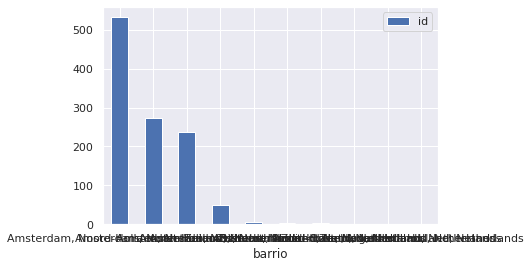

In [ ]:
df_top10['barrio'] = df_top10.index
df_top10.reset_index()
df_top10

df_top10.dtypes

ax = df_top10.plot.bar(x='barrio', y='id', rot=0)

# **Los 3 barrios  más importantes son: North Holland, Amsterdam-Zuidoost, North Holland, Netherlands , Abcoude, Utrecht, Netherlands**

### Ejercicio 7

Superhost (cuya traducción del inglés significa “Super anfitrión”) es una categoría de Airbnb que destaca a los anfitriones más experimentados, hospitalarios y mejor valorados. Estos anfitriones reciben un distintivo especial en su anuncio y su perfil que les otorga una mayor visibilidad en la plataforma.

¿Qué porcentaje de los hospedajes son ofrecidos por un superhost?

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* value_counts()
* Normalice el conteo y multiplique por 100
* Haga una gráfica

In [ ]:
# Respuesta
df_sh=airbnb['host_is_superhost']

In [ ]:
s1=airbnb['host_is_superhost'].value_counts()
df2=s1.to_frame()
df_transp=df2.T

no_superhost=df_transp.loc['host_is_superhost','f']
si_superhost=df_transp.loc['host_is_superhost','t']

In [ ]:
total=si_superhost+no_superhost
total

1122

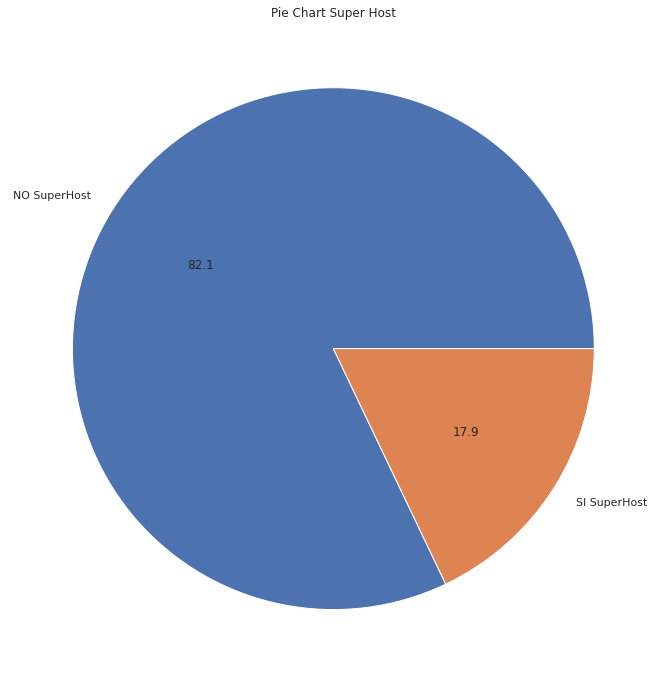

In [ ]:
s = pd.Series(data=[no_superhost,si_superhost ],index = ['NO SuperHost', 'SI SuperHost'])
ax = s.plot.pie(autopct='%.1f')
# followed by the standard plot output ...
ax.set_title('Pie Chart Super Host')
ax.set_aspect(1) # make it round
ax.set_ylabel('') # remove default
fig = ax.figure
fig.set_size_inches(20, 12)
fig.savefig('filename.png', dpi=125)
plt.show()

In [ ]:
grupo=airbnb.groupby(by='host_is_superhost')

In [ ]:
grupo.count()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_is_superhost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,921,921,921,921,921,921,921,921,921,921,921,921,921,921,596,596,715,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,920,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921
t,201,201,201,201,201,201,201,201,201,201,201,201,201,201,198,198,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201


# **De acuerdo a la grafica el 17% de los hospedadores tienen la calificación de Superhost**

### Ejercicio 8

Basado en los ejercicios anteriores analice las variable property_type y parking con los recursos que considere necesarios. No olvide analizar y describir sus resultados.

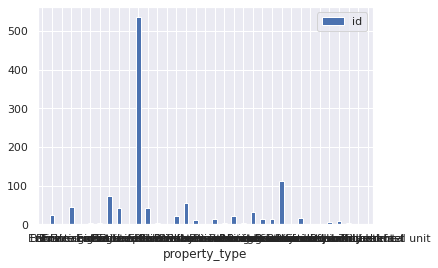

In [ ]:
# Respuesta
n_by_state = airbnb.groupby("property_type")["id"].count()
df_cuenta_hospedajes=n_by_state.to_frame()

df_cuenta_hospedajes['property_type'] = df_cuenta_hospedajes.index


ax = df_cuenta_hospedajes.plot.bar(x='property_type', y='id', rot=0)



# **# El tipo de propiedad que más gusta es:Entire rental unit con 536 personas hospedadas pero el gráfco no lo muestra de manera correcta ya que se solapan las etiquetas del gráfico**

## Análisis multivariado

Hasta aquí hemos estado analizando nuestras variables y describiendo las características principales de nuestra población. Ahora vamos a comenzar a buscar relaciones entre nuestras variables, sobretodo con respecto al precio, recuerde que esta es nuestra variable objetivo.


### Ejercicio 9

Construya una gráfica que muestre el mínimo, máximo, media y mediana del precio para las hospedajes con Superhost y sin Superhost.

¿Existe alguna relación entre el precio y ser un *Superhost*? Justifique su respuesta.

Recuerde describir y discutir sus resultados. 


<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* agrupe los datos usando `.groupby()` 
* Use el método `.agg()` para calcular las descriptivas de la variable precio
* Grafique con el método `.plot`  
* Puede construir también un boxplot.



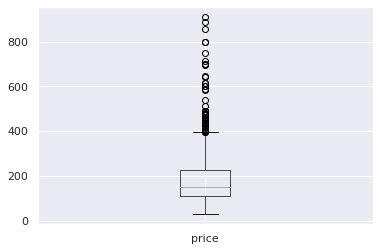

In [ ]:
# Respuesta

df_superhost=airbnb[['price','host_is_superhost']]
grouped_df = df_superhost.groupby('host_is_superhost')
grouped_df.mean()
boxplot = df_superhost.boxplot(column=['price'])  

# **De acuerdo al gráfico no se ve una correlación entre superhost y el precio ya que los huespedes buscan precios de alrededor de 200 dólares por noche**


### Ejercicio 10

Para complementar el punto anterior, construya un boxplot para evaluar la siguiente pregunta. 

¿Existe alguna relación entre el precio y ser un *Superhost*? Justifique su respuesta.

In [ ]:
# Respuesta
df_superhost['host_is_superhost'] = df_superhost['host_is_superhost'].str.replace('t','1')
df_superhost['host_is_superhost'] = df_superhost['host_is_superhost'].str.replace('f','0')
df_superhost['host_is_superhost'] = pd.to_numeric(df_superhost['host_is_superhost'],errors='coerce')







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_superhost.corr()

,price,host_is_superhost
price,1.000000,-0.092131
host_is_superhost,-0.092131,1.000000


# **A menudo nos interesa observar y medir la relación entre 2 variables numéricas mediante el *análisis* de correlación. Se trata de una de las técnicas más habituales en análisis de datos y el primer paso necesario antes de construir cualquier modelo explicativo o predictivo más complejo, se realizón en base al dataframe este análisis haciendo que la variable categórica donde se identifica si es superhost se transforme a numérica es decir que si es superhost sea 1 y 0 de no serlo, se determino por el Coeficiente de Pearson que no tienen correlación ya que nos da un valor absoluto cercano a 0 (-0.092131) **bold text**

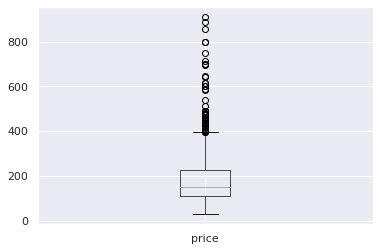

In [ ]:

boxplot = df_superhost.boxplot(column=['price'])  

## Ejemplo 1: Análisis del precio en función del tipo de propiedad

Analicemos ahora la relación entre el tipo de propiedad y el precio usando un boxplot.


In [ ]:
# Para darle orden a la gráfica vamos a organizar los tipos de propiedades de menor mayor mediana

median_order = (airbnb.groupby('property_type') # agrupar por tipo de propiedad
['price'].                                      # filtrar el precio en cada grupo
median().                                       # calcular la mediana
sort_values().                 # organizar 
index)

median_order

Index(['Shared room in rental unit', 'Private room in home', 'Barn',
       'Private room in farm stay', 'Private room in bungalow',
       'Private room in townhouse', 'Private room in rental unit',
       'Private room in guesthouse', 'Private room in condo',
       'Private room in villa', 'Tiny home', 'Room in boutique hotel',
       'Private room in guest suite', 'Entire guesthouse',
       'Room in bed and breakfast', 'Entire guest suite', 'Room in hotel',
       'Private room in houseboat', 'Private room in loft',
       'Private room in boat', 'Private room in bed and breakfast',
       'Private room in tiny home', 'Entire rental unit', 'Entire condo',
       'Entire home', 'Entire townhouse', 'Entire cabin', 'Room in aparthotel',
       'Entire cottage', 'Entire loft', 'Houseboat', 'Entire place', 'Boat',
       'Farm stay', 'Entire villa'],
      dtype='object', name='property_type')

Text(0.5, 1.0, 'Precio del hospedaje en función del tipo de propiedad')

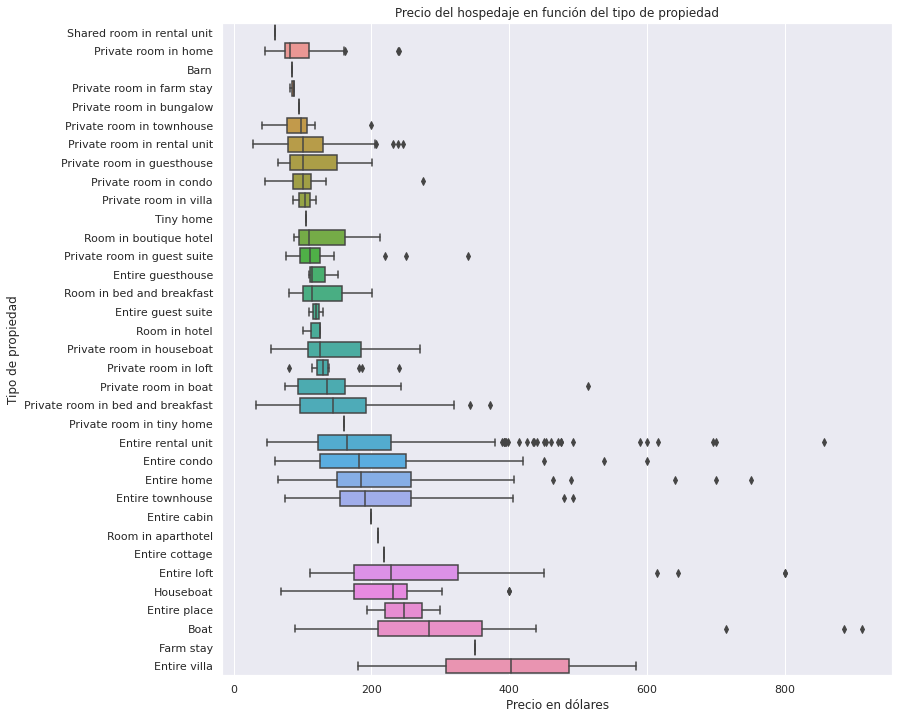

In [ ]:
fig = plt.figure(figsize = (12,12) ) # se crea la figura y se determina el tamaño

sns.boxplot(data = airbnb, 
            y = 'property_type', 
            x = 'price',
            order = median_order ) # ordenamiento de mayor a menor frecuencia

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

Debido a la cantidad tan grande de tipos de propiedad, la gráfica anterior carece de valor y es demasiado compleja. Vamos a crear un subconjunto de datos solamente con los 5 tipos de propiedades que tienen mayor frecuencia. En el proceso no perderemos demasiados datos, ya que, el 96% de los hospedajes pertenecen a estas 5 categorías.


In [ ]:
# Primero, encontramos cuales son los 5 tipos de propiedades más comunes

airbnb['property_type'].value_counts(normalize = True).head(5)*100

Entire rental unit                   47.771836
Private room in rental unit          10.071301
Entire home                           6.595365
Private room in bed and breakfast     4.812834
Entire condo                          4.010695
Name: property_type, dtype: float64

In [ ]:
# Extraemos el índice que contiene el nombre de las categorías de interés

top5_properties = (airbnb['property_type'].value_counts(normalize = True).head(5)*100).index
top5_properties

Index(['Entire rental unit', 'Private room in rental unit', 'Entire home',
       'Private room in bed and breakfast', 'Entire condo'],
      dtype='object')

In [ ]:
top5_properties.to_frame()

,0
Entire rental unit,Entire rental unit
Private room in rental unit,Private room in rental unit
Entire home,Entire home
Private room in bed and breakfast,Private room in bed and breakfast
Entire condo,Entire condo


`.isin()` nos permite encontrar todas las coincidencias existentes sobre una lista u objeto iterable. En este caso nos permite encontrar todos los hospedajes que pertenezcan a nuestro top 5 de tipos de propiedades. Para más información sobre este método consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html).



In [ ]:
# Creamos un filtro con el método isin()

top = airbnb.loc[airbnb['property_type'].isin (top5_properties)]
top.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,18801518.0,https://www.airbnb.com/rooms/18801518,2.022061e+13,2022-06-05,Coronaproof studio 20 min to A'dam Centre 2-4 ...,We have a CORONAPROOF studio for 4 people (2 s...,Within a 50-100 meter radius of Studio Randje ...,https://a0.muscache.com/pictures/2cdc1fbf-efbc...,75979829.0,https://www.airbnb.com/users/show/75979829,Randje Amsterdam,2016-06-05,"Diemen, North Holland, Netherlands",--,within an hour,90%,62%,f,https://a0.muscache.com/im/pictures/user/02c65...,https://a0.muscache.com/im/pictures/user/02c65...,--,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Diemen, Noord-Holland, Netherlands",Watergraafsmeer,--,52.33828,4.96443,Private room in rental unit,Private room,4.0,3.0,1 private bath,2.0,3.0,"[""Essentials"", ""Cooking basics"", ""Private fenc...",140.0,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,--,t,0.0,8.0,14.0,234.0,2022-06-05,85.0,5.0,0.0,2017-07-12,2022-04-17,4.66,4.83,4.90,4.93,4.81,4.46,4.59,038429E48399CA3E3903,f,1.0,0.0,1.0,0.0,1.42
5,2973384.0,https://www.airbnb.com/rooms/2973384,2.022061e+13,2022-06-05,House on Amstel River Amsterdam,"Our house is in the country side ""Amstel River...",--,https://a0.muscache.com/pictures/7913ec9d-3081...,15166925.0,https://www.airbnb.com/users/show/15166925,Gijs,2014-05-06,"Amsterdam, Ouderkerk aan de Amstel","Gijs and Eline, we have a son Jacob. Working i...",within a day,100%,38%,f,https://a0.muscache.com/im/pictures/user/4cbe0...,https://a0.muscache.com/im/pictures/user/4cbe0...,--,1.0,1.0,"['email', 'phone']",t,f,--,Watergraafsmeer,--,52.30989,4.90528,Entire home,Entire home/apt,5.0,4.0,1.5 baths,3.0,3.0,"[""Boat slip"", ""Dishwasher"", ""Bathtub"", ""Microw...",185.0,6.0,21.0,6.0,6.0,21.0,21.0,6.0,21.0,--,t,0.0,0.0,5.0,13.0,2022-06-05,7.0,2.0,0.0,2018-08-19,2022-01-06,4.83,5.00,4.67,5.00,5.00,5.00,4.67,--,f,1.0,1.0,0.0,0.0,0.15


In [ ]:
# Creamos una lista con las 5 propiedades ordenadas de mayor a menor mediana

median_order_top = (top.groupby('property_type')
['price']
.median()
.sort_values(ascending= False)
.index)

median_order_top

Index(['Entire home', 'Entire condo', 'Entire rental unit',
       'Private room in bed and breakfast', 'Private room in rental unit'],
      dtype='object', name='property_type')

Text(0.5, 1.0, 'Precio del hospedaje en función del tipo de propiedad')

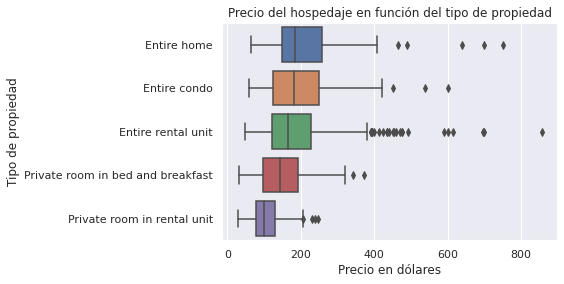

In [ ]:
# Finalmente construimos la gráfica solicitada con el nuevo subconjunto top

sns.boxplot(data = top, 
            y = 'property_type', 
            x = 'price',
            order = median_order_top) # las organizamos de acuerdo al top 5 obtenido anteriormente

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

En la anterior visualización podemos observar una alta dispersión para  todas las categorías. Todas las distribuciones son asimétricas hacía la derecha, la asimetría es ocasionada por propiedades con precios mayores a la media en cada caso. Comparando las medianas podemos observar que en general los condominios son los tipos de propiedad más costosos seguido por los lofts y los apartamentos. 

**Conclusión: Se observa una distribución de precios ligeramente diferente para cada tipo de propiedad. Los precios sí se ven afectados por el tipo de propiedad, sin embargo, solamente esta variable no permite explicar el comportamiento del precio.**

Nota: Observe que en la gráfica general hay tipos de propiedades con mayor precio promedio que los condominios y menor precio que las casas, discuta al respecto.

### Ejercicio 11  (Díficil)

Repita el análisis que acabamos de hacer en el ejemplo anterior con el tipo de propiedad y su relación con el precio, pero ahora responda: **¿Existe una relación entre el barrio y el precio por noche del Airbnb?**

In [ ]:
# Respuesta

median_order = (airbnb.groupby('neighbourhood') # agrupar por tipo de propiedad
['price'].                                      # filtrar el precio en cada grupo
median().                                       # calcular la mediana
sort_values().                 # organizar 
index)

median_order

Index(['Jordaan, North Holland, Netherlands',
       'Amsterdam-Zuidoost, North Holland, Netherlands',
       'Amsterdam-Zuidoost, Noord-Holland, Netherlands',
       'Amsterdam , Noord-Holland, Netherlands',
       'Abcoude, Utrecht, Netherlands',
       'Watergang, Noord-Holland, Netherlands',
       'Amsterdam Zuid-Oost, Noord-Holland, Netherlands',
       'Amsterdam, Noord Holland, Netherlands',
       'Amsterdam, Haarlemmerbuurt, Netherlands',
       'Amsterdam, North-Holland, Netherlands', 'Amsterdam, SN, Netherlands',
       'Zuiderwoude, Noord-Holland, Netherlands',
       'Diemen, Noord-Holland, Netherlands',
       'Zeeburg, North Holland, Netherlands',
       'Amsterdam, North Holland, Netherlands', '--',
       'Landsmeer, Noord-Holland, Netherlands',
       'Weesp, Noord-Holland, Netherlands',
       'Amsterdam, Noord-Holland, Netherlands', 'Amsterdam, NH, Netherlands',
       'De Pijp, North Holland, Netherlands',
       'Amsterdam , 2 de Egelantiersdwarsstraat 13 III, Ne

Text(0.5, 1.0, 'Precio del hospedaje en función del Barrio')

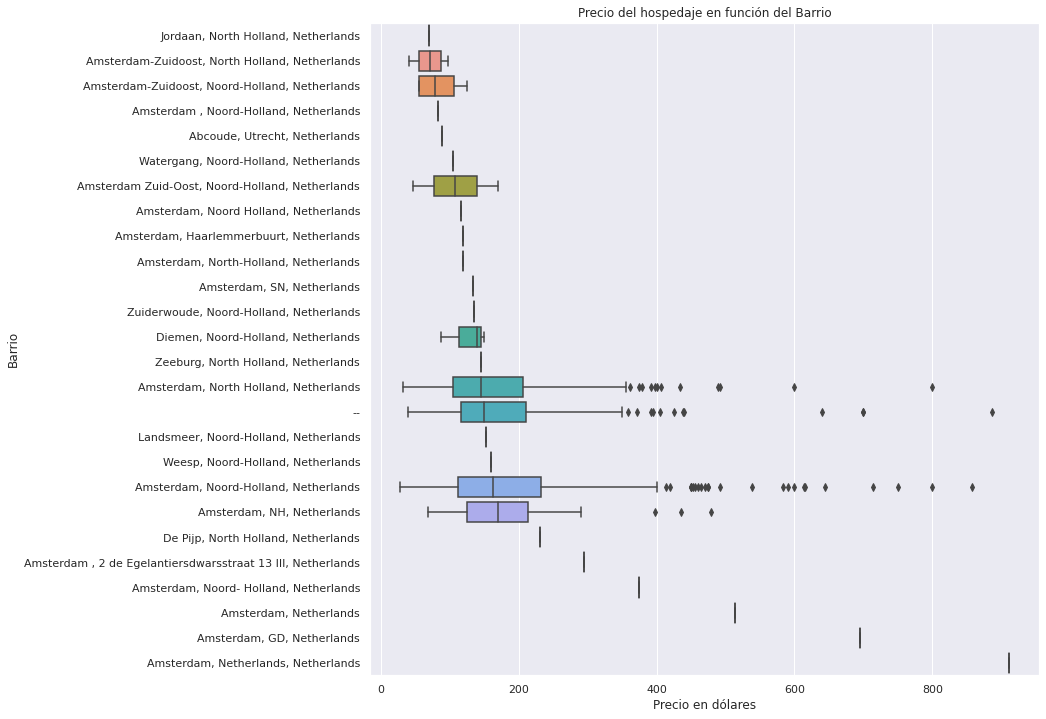

In [ ]:
fig = plt.figure(figsize = (12,12) ) # se crea la figura y se determina el tamaño

sns.boxplot(data = airbnb, 
            y = 'neighbourhood', 
            x = 'price',
            order = median_order ) # ordenamiento de mayor a menor frecuencia

plt.xlabel('Precio en dólares')
plt.ylabel('Barrio')
plt.title('Precio del hospedaje en función del Barrio')

In [ ]:
# Primero, encontramos cuales son los 5 tipos de propiedades más comunes

airbnb['neighbourhood'].value_counts(normalize = True).head(5)*100

Amsterdam, Noord-Holland, Netherlands             47.415330
--                                                24.242424
Amsterdam, North Holland, Netherlands             21.122995
Amsterdam, NH, Netherlands                         4.367201
Amsterdam-Zuidoost, North Holland, Netherlands     0.445633
Name: neighbourhood, dtype: float64

In [ ]:
# Extraemos el índice que contiene el nombre de las categorías de interés

top5_properties = (airbnb['neighbourhood'].value_counts(normalize = True).head(5)*100).index
top5_properties

Index(['Amsterdam, Noord-Holland, Netherlands', '--',
       'Amsterdam, North Holland, Netherlands', 'Amsterdam, NH, Netherlands',
       'Amsterdam-Zuidoost, North Holland, Netherlands'],
      dtype='object')

In [ ]:
top5_properties.to_frame()

,0
"Amsterdam, Noord-Holland, Netherlands","Amsterdam, Noord-Holland, Netherlands"
--,--
"Amsterdam, North Holland, Netherlands","Amsterdam, North Holland, Netherlands"
"Amsterdam, NH, Netherlands","Amsterdam, NH, Netherlands"
"Amsterdam-Zuidoost, North Holland, Netherlands","Amsterdam-Zuidoost, North Holland, Netherlands"


In [ ]:
# Creamos un filtro con el método isin()

top = airbnb.loc[airbnb['neighbourhood'].isin (top5_properties)]
top.head(2)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,2.973384e+06,https://www.airbnb.com/rooms/2973384,2.022061e+13,2022-06-05,House on Amstel River Amsterdam,"Our house is in the country side ""Amstel River...",--,https://a0.muscache.com/pictures/7913ec9d-3081...,15166925.0,https://www.airbnb.com/users/show/15166925,Gijs,2014-05-06,"Amsterdam, Ouderkerk aan de Amstel","Gijs and Eline, we have a son Jacob. Working i...",within a day,100%,38%,f,https://a0.muscache.com/im/pictures/user/4cbe0...,https://a0.muscache.com/im/pictures/user/4cbe0...,--,1.0,1.0,"['email', 'phone']",t,f,--,Watergraafsmeer,--,52.309890,4.905280,Entire home,Entire home/apt,5.0,4.0,1.5 baths,3.0,3.0,"[""Boat slip"", ""Dishwasher"", ""Bathtub"", ""Microw...",185.0,6.0,21.0,6.0,6.0,21.0,21.0,6.0,21.0,--,t,0.0,0.0,5.0,13.0,2022-06-05,7.0,2.0,0.0,2018-08-19,2022-01-06,4.83,5.00,4.67,5.0,5.0,5.00,4.67,--,f,1.0,1.0,0.0,0.0,0.15
7,6.208214e+17,https://www.airbnb.com/rooms/620821365404674198,2.022061e+13,2022-06-05,"Homestay, 10 minutes away from the city center.",Homestay is just 10 minutes from the city cent...,--,https://a0.muscache.com/pictures/e2069438-7276...,405567985.0,https://www.airbnb.com/users/show/405567985,Homestay Amsterdam,2021-06-06,"Duivendrecht, Noord-Holland, Netherlands",--,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/a8e95...,https://a0.muscache.com/im/pictures/user/a8e95...,--,0.0,0.0,"['email', 'phone']",t,f,--,Bijlmer-Centrum,--,52.329773,4.937512,Private room in home,Private room,2.0,4.0,1 private bath,1.0,2.0,"[""Free parking on premises"", ""First aid kit"", ...",120.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,--,t,17.0,41.0,70.0,343.0,2022-06-05,3.0,3.0,3.0,2022-05-15,2022-05-30,4.33,4.67,4.67,5.0,5.0,4.33,4.33,--,t,1.0,0.0,1.0,0.0,3.00


In [ ]:
# Creamos una lista con las 5 propiedades ordenadas de mayor a menor mediana

median_order_top = (top.groupby('neighbourhood')
['price']
.median()
.sort_values(ascending= False)
.index)

median_order_top


Index(['Amsterdam, NH, Netherlands', 'Amsterdam, Noord-Holland, Netherlands',
       '--', 'Amsterdam, North Holland, Netherlands',
       'Amsterdam-Zuidoost, North Holland, Netherlands'],
      dtype='object', name='neighbourhood')

Text(0.5, 1.0, 'Precio del hospedaje en función del Barrio')

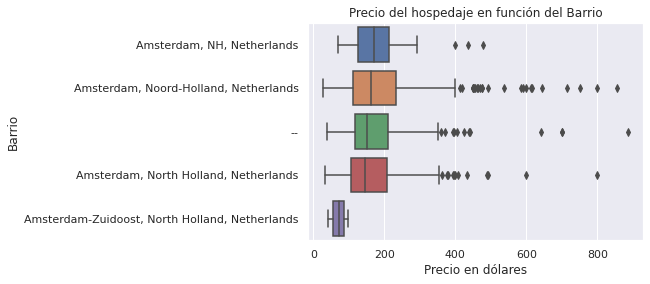

In [ ]:
# Finalmente construimos la gráfica solicitada con el nuevo subconjunto top

sns.boxplot(data = top, 
            y = 'neighbourhood', 
            x = 'price',
            order = median_order_top) # las organizamos de acuerdo al top 5 obtenido anteriormente

plt.xlabel('Precio en dólares')
plt.ylabel('Barrio')
plt.title('Precio del hospedaje en función del Barrio')

Conocida como la ciudad de las bicicletas y de los canales, la capital de los Países Bajos es uno de los mejores destinos turísticos de toda Europa en el que podrás pasar unos divertidos e interesantes días gracias a su interminable oferta de ocio y cultura.
En el Dataset se puede observar que los datos están muy dispersos entre barrios, es decir no se podría deternimar una correlación directa entre estos

### Ejercicio 12

Construya un boxplot entre la variable parqueadero y precio.

¿Existe alguna relación entre si un Airbnb tiene parqueadero y su precio?

# En el archivo no existe el campo de parking por ello no se puede realizar este ejercicio

### Ejercicio 13

Construya una gráfica de dispersión de longitud y latitud. Longitud debe ir en el eje horizontal y latitud en el eje vertical. Para más información consulte [aquí](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Latitud_y_Longitud_en_la_Tierra.svg/1920px-Latitud_y_Longitud_en_la_Tierra.svg.png).


¿Encuentra algunos patrones? ¿Los hospedajes se distribuyen de forma homogénea en la ciudad de Nueva York?

In [ ]:
# Respuesta
x=airbnb['longitude']
y=airbnb['latitude']

df= airbnb[['longitude','latitude' ]]


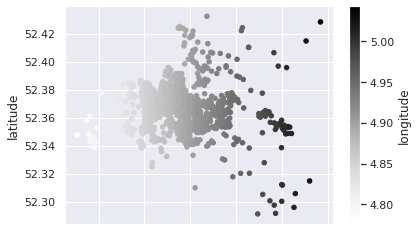

In [ ]:
ax = df.plot.scatter(x='longitude', y='latitude' ,   c='longitude')

## Ejemplo 2: Uso de jointplot para evaluar puntos con alta concentración de hospedajes

En la visualización anterior pudimos observar algunos patrones de distribución de los hospedajes, sin embargo, por la gran cantidad de puntos no es posible analizar qué zonas tienen mayor cantidad de hospedajes. Vamos a ver un nuevo tipo de visualización que nos ayudará en ese análisis. La visualización jointplot nos va permitir visualizar al tiempo la distribución de cada variable por separado y adicionalmente veremos dónde hay mayor concentración de puntos usando un mapa de calor.

Para más información de este tipo de visualización consulte [aquí](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

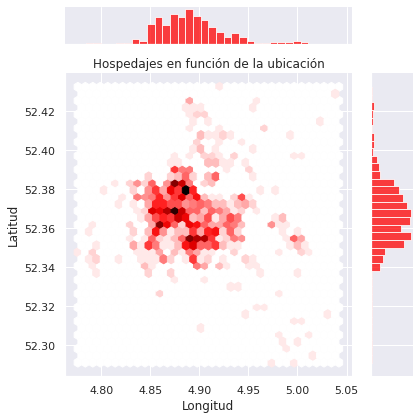

In [ ]:
sns.jointplot(data = airbnb,
              x='longitude', 
              y='latitude', 
              kind="hex", # define la forma de las zonas que vamos a construir
              color = 'red')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Hospedajes en función de la ubicación')
plt.tight_layout() # Evita el sobrelapamiento de elementos

# Los Hospedajes se concentran entre la latitud 4.90 y longitud 52.36, lo que evidencia que la mayoría de turistan prefieren este sector donde esta el barrio Amsterdam, North Holland, Netherlands

### Ejercicio 14

Utilice un jointplot para analizar la relación entre el número de reseñas (reviews) y el precio.
¿Existe una relación entre el precio y el número de reseñas?

In [ ]:
# Respuesta

### Ejercicio 15

¿Existe alguna relación entre los Superhosts y el número de reseñas?

Puede emplear un diagrama de barras o un boxplot para responder esta pregunta. No olvide discutir el resultado.

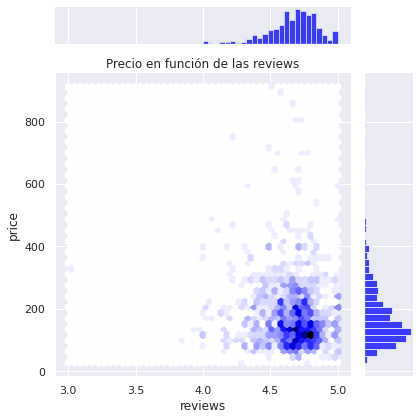

In [ ]:
# Respuesta

sns.jointplot(data = airbnb,
              x='review_scores_value', 
              y='price', 
              kind="hex", # define la forma de las zonas que vamos a construir
              color = 'blue')

plt.xlabel('reviews')
plt.ylabel('price')
plt.title('Precio en función de las reviews')
plt.tight_layout() # Evita el sobrelapamiento de elementos

# LA puntuación del sitio en donde se concentra la mayor parte de turistas es 4.5 para precios entre 180 y 200 dólares

## Ejemplo 3: Creación de un geoheatmap con Folium

Vamos a trabajar con una herramientas de visualización de mapas interactivos. La librería se se llama folium. Instalamos la librería usando el gestor de paquetes pip. También importamos los módulos necesarios para crear nuestra visualización. Para más información de la librería folium consulte la [Documentación](https://python-visualization.github.io/folium/).

In [ ]:
!pip install -U folium==0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium 
from folium.plugins import HeatMap

In [ ]:
map = folium.Map()
map

Podemos ubicar el mapa donde queramos, solo necesitamos las coordenadas del lugar. Por ejemplo, situemos nuestro mapa en la Plaza de Bolívar en Bogotá. Las coordenadas fueron obtenidas usando Google Maps. 
La estructura de las coordenadas es la siguiente:
```
[Latitud, Longitud]
```



In [ ]:
plaza_bolivar = [4.598464,-74.076184] # Coordenas de la plaza de Bolívar

map = folium.Map(location = plaza_bolivar,
                 zoom_start= 20, # Zoom inicial, valor más grande, mayo zoom
                 tiles="OpenStreetMap")
map

Luego de esa prueba interesante, ahora sí, construyamos el mapa de Nueva York con las coordenadas respectivas, vamos a centrar el mapa en Central Park.

In [ ]:
nueva_york = [40.781027,-73.965726]
map1 = folium.Map(location = nueva_york, zoom_start= 10,tiles="OpenStreetMap")
map1

Ahora necesitamos entregarle a Folium un contenedor de los datos de latitud y longitud. Para eso usamos la función zip que convierte dos objetos iterables y une los elementos en tuplas. Para más información consulte [aquí](https://ellibrodepython.com/zip-python).

In [ ]:
data = list(zip(airbnb['latitude'], 
                airbnb['longitude']))

data[0:10]

[(52.34916, 4.97879),
 (52.42419, 4.95689),
 (52.43237, 4.91821),
 (52.31475, 5.0303),
 (52.33828, 4.96443),
 (52.30989, 4.90528),
 (52.42831, 5.042191),
 (52.329773435800476, 4.937511981512809),
 (52.29591, 5.01325),
 (52.33851, 4.99961)]

Ahora vamos a crear la capa del mapa de calor usando un plugin de Folium llamada HeatMap. A este le pasamos los datos y algunos parámetros para ajustar el color. Es importante que la librería Folium esté actualizada para que el mapa sea reproducible. 

In [ ]:
hm_loc = HeatMap(data,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

In [ ]:
# Ahora añadimos la capa al mapa que ya habíamos creado

map1.add_child(hm_loc)
map1

El mapa de calor anterior nos está mostrando en que zonas de la ciudad hay una mayor densidad de hospedajes.

In [ ]:
# Podemos guardar el mapa como un archivo html interactivo

map1.save("heat_map_density.html")

### Ejercicio 16

Discuta y analice lo que observa en el mapa de calor que acabamos de crear.

Respuesta

## Ejemplo 3: Creación de un geoheatmap con Folium

Ahora vamos a crear un mapa de calor que nos muestre en que zonas de la ciudad están los hospedajes más costosos.

### Ejercicio 17

Haga un análisis del mapa que acabamos de crear.

In [ ]:
data = list(zip(airbnb['latitude'], 
                airbnb['longitude']))

In [ ]:
hm_loc = HeatMap(data,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)
map

# Esta vista muy interesente de la ciudad de Amsterdam nos muestra los pundos de concentración de los hospedajes y permite visualizar los lugares y barrios donde los visitantes prefiren visitar

### Ejercicio 18

Escriba sus conclusiones del análisis de datos realizado. Recuerde que las conclusiones deben ser números, estadísticos, información que sale del análisis, no es un resumen de lo aprendido, ni una observación personal acerca del trabajo realizado, ¿qué comportamiento muestran los datos? ¿cuales fueron las respuestas a las preguntas de negocio? ¿cuales considera hasta ahora las variables más importantes respecto a su relación con el precio?
¿Encontró errores en los datos, atípicos? **Las conclusiones son parte fundamental de un informe y/o trabajo investigativo.**

# El análisis exploratorio de datos implica el uso de gráficos y visualizaciones para explorar y analizar un conjunto de datos. El objetivo es explorar, investigar y aprender, no confirmar hipótesis estadísticas. 
# New Section
# El proceso de utilizar resúmenes numéricos y visualizaciones para explorar sus datos e identificar posibles relaciones entre variables se denomina análisis exploratorio de datos.

# Se ha llegado a las conclusiones siguientes:



# *   Existe poca relación entre el precio de un hospedaje con respecto a si su hospedador es superhost o nó
# *   La mayoria de personas que se hospedan necesitan habitaciones de entre 160 y 200 dólares por noche.
# *   Los mapas de calor combinados con los scater plor ayudan a identificar los puntos de latitud y longitud donde las personas prefieren hospedarse
# *   Se determinó que los tres sitios preferidos para hospedarse en Amsterdan son: Amsterdam, Noord-Holland, Netherlands,Abcoude, Utrecht, Netherlands,Amsterdam , 2 de Egelantiersdwarsstraat 13 III, Netherlands






## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*